# **1. 텍스트 유사도 구하기**

- G-Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/20221012_NLP/data/'

## **1.1 기본적인 유사도 계산 방법**

### 1.1.1 Norm 기반 유사도

- Norm (대한수학회 표준 용어로는 '노름'으로 읽음)
  - 선형대수에서의 Norm은 공간에 있는 모든 벡터의 총 길이를 나타낸다.
  - 거리의 일반화가 거리함수(distance function, 혹은 metric)라면 노름은 크기의 일반화를 가리키다.
  - 실수의 크기(절댓값)를 $\lvert x \rvert$로 표현하듯, 벡터의 크기(노름)은 일반적으로 $\lVert{x}\rVert$라고 표현한다.
  - 저자에 따라서는 유클리드 공간의 노름을 $\lvert{x}\rvert$로 쓰기도 한다.

- Norm의 정의
  - $V$가 복소수체 $F$ 위의 벡터공간이고 함수 $f:V \rightarrow \mathbb{R}$가 다음을 모두 만족시킬 때, 함수 $f$를 ($V$위에서의) Norm(a norm on V)라고 한다.
    - 복소수체 $F$의 임의의 원소 $a$와 벡터공간 $V$의 임의의 원소 $u$, $v$에 대하여
      - $f(au)=\lvert{a}\rvert⋅f(u)$
      - $f(u+v)≤f(u)+f(v)$
      - 만약 $f(u)=0$이면 $u$는 영벡터이다.
  - 노름을 나타내는 함수는 $f$보다는 $\lVert\cdot\rVert$로 표기하는 경우가 많다. (즉, $f(u)=\lVert{u}\rVert$ 로 표기)
  - 세 가지 성질 중 1, 2번만 만족하는 경우는 반노름(seminorm)이라고 한다.

- Norm의 성질
  - 값이 항상 0보다 크거나 같다.(from 정의 1, 2)
  - 정의 3을 따르지 않는 반노름도 $f(u)≥0$이 항상 성립한다.
  - $f(0)=f(0⋅0)=0f(0)=0$
  - 임의의 $u∈V$에 대해 $f(-u)= \lvert{-1}\rvert f(u)= f(u)f(−u)=\lvert{-1}\rvert f(u)=f(u)$
  - 임의의 $u∈V$에 대해 $0=f(0)=f(u−u)≤f(u)+f(−u)=f(u)+f(u)=2f(u)$, (부등식$≤$은 2번 공리인 삼각부등식. 양 변을 2로 나누면 결과를 얻을 수 있음)

- Norm의 종류
  - L0 Norm
    - 실제 거리를 나타내는 Norm은 아님
    - 여러 개의 벡터 구성 요소 중에서 몇 개의 요소가 변화했는지, 올바르게 구성되어 있는지에 대한 확인을 위해 사용됨
    - 벡터에서 0이 아닌 요소의 총 수에 해당함
    - 예: 벡터 (0,0), (0,2)의 L0 Norm은 0이 아닌 요소가 하나뿐이므로 1
<br><br>
  - L1 Norm
    - 맨해튼 거리(Manhattan Distance/Norm) 또는 택시 거리(Taxicab Norm)라고 부르기도 함
    - 두 벡터의 각 차원별 값의 차이의절대값을 모두 합한 값이며, 일반적인 거리가 아닌 특이한 거리을 표시하는 특징을 가짐
    - 예: 좌표공간에 A(3,4)라는 점이 있다면 일반적인 (원점으로부터의)거리는
$\sqrt{{3^2}+{4^2}}=5$ 이지만 L1 Norm은 $3+4=7$임
    - 계산 방법: $\lVert{x}\rVert_1=\lvert{3}\rvert+\lvert{4}\rvert=7$
    - <img src='https://drive.google.com/uc?export=download&id=1GUXEIgE_5gWzWnhtQcaTJ9GJdeoeR2nh'>
$$
\text{d}_{\text{L1}}(w,v)=\sum_{i=1}^d{|w_i-v_i|},\text{ where }w,v\in\mathbb{R}^d.
$$
<br><br>
  - L2 Norm
    - 가장 널리 사용되는 표준 거리로 유클리드 공간(Euclidean Space)에 존재하기때문에 유클리디안 거리(Euclidean Distance)라고도 부름
    - 잘 알려진 피타고라스의 정리에 따른 거리 계산 방법
    - 한 지점에서 다른 지점으로 이동할 수 있는 최단 거리
    - 계산 방법: $\lVert{x}\rVert_2=\sqrt{{\lvert{3}\rvert}^2+{\lvert{4}\rvert}^2}=\sqrt{9+16}=\sqrt{25}=5$
    
    - <img src='https://drive.google.com/uc?export=download&id=1OdiWb0n8IiweZcLicjlNasjM7le7oNYZ'>
    - 벡터의 각 구성요소가 제곱 값으로 계산되므로, 특이값들이 일반적인 값보다 더 많은 가중치를 가지게 되어 결과를 왜곡하기 쉬움 → 일부 상황에서는 L1 Norm을 사용하게 되는 이유가 됨
    - 선형회귀의 선형성을 이탈하는 데이터 점(특이점)들에 대한 왜곡이 선형회귀식에서는 매우 큰 오류로 작용하게 되므로 그러한 경우에 L1 Norm을 사용하도록 설정하고 있지만 실무에서는 그냥 특이값은 제거해 버리는 편임
$$
\text{d}_{\text{L2}}(w,v)=\sqrt{\sum_{i=1}^d{(w_i-v_i)^2}},\text{ where }w,v\in\mathbb{R}^d.
$$
<br><br>
  - L-infinity Norm ($L_∞$ Norm)
    - 벡터공간에서 가장 큰 크기를 제공하는 Norm
    - 머신러닝, 딥러닝 분야에서는 그다지 취급하지 않음
$$
d_{\infty}(w,v)=\max(|w_1-v_1|,|w_2-v_2|,\cdots,|w_d-v_d|),\text{ where }w,v\in\mathbb{R}^d
$$

In [1]:
import torch

In [ ]:
# L1 Distance
def get_l1_distance(x1, x2):
    return ((x1 - x2).abs()).sum()

In [ ]:
# L2 Distance
def get_l2_distance(x1, x2):
    return ((x1 - x2)**2).sum()**.5

In [ ]:
# L-Infinity Distance
def get_infinity_distance(x1, x2):
    return ((x1 - x2).abs()).max()

### 1.1.2 n-gram 유사도
- n-gram
  - 주어진 문장에서 n개의 연속적인 단어 시퀀스(나열)를 의미
  - n-gram은 문장에서 n개의 단어를 토큰으로 사용함
  - 이웃한 단어의 출현 횟수를 통계적으로 표현해 텍스트의 유사도를 계산하는 방법
  - $\begin{aligned}Similarity=\frac{tf(A,B)}{tokens(A)}\end{aligned}$

- n에 따른 n-gram
  - 1661년 6월 뉴턴은 선생님의 제안으로 트리니티에 입학하였다.
    - n=1: 1661년 / 6월 / 뉴턴 / 선생님 / 제안 / 트리니티 / 입학 (unigram)
    - n=2: 1661년 6월 / 6월 뉴턴 / 뉴턴 선생님 / 선생님 제안 / 제안 트리니티 / 트리니티 입학 (bigram)
    - n=3: 1661년 6월 뉴턴 / 6월 뉴턴 선생님 / 뉴턴 선생님 제안 / 선생님 제안 트리니티 / 제안 트리니티 입학 (trigram)
    - n=4: 1661년 6월 뉴턴 선생님 / 6월 뉴턴 선생님 제안 / 뉴턴 선생님 제안 트리니티 / 선생님 제안 트리니티 입력 (4-gram)
  - n-gram이 토큰을 분리하는 방법:2-gram 예시
  <img src='https://drive.google.com/uc?export=download&id=1SS4n-FXj5_LO8aB1gUvpIvAaOHkVaToj' width="500" height ="" />
  - n-gram을 이용한 문장 간의 유사도 계산
    - 해당 문장을 n-gram으로 토큰 분리
    - 단어 문서 행렬(Term-Document Matrix, TDM) 생성
    - 두 문장 간 비교, 동일한 단어의 출현빈도를 확률로 계산
    - 계산 결과가 1.0에 가까울수록 B가 A와 유사하다고 볼 수 있음
  - n-gram을 이용한 유사도 계산 과정 예시
    - 문장
      - 6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.
      - 6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.

    <img src='https://drive.google.com/uc?export=download&id=17Ye-1t85Yq9LTTqCXsaJH4VEJ--QIT1a'/>

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 67.8 MB/s 


In [ ]:
from konlpy.tag import Komoran

In [ ]:
# 어절 단위 n-gram
def word_ngram(bow, num_gram):
    text = tuple(bow)
    ngrams = [text[x:x + num_gram] for x in range(0, len(text))]
    return tuple(ngrams)

In [ ]:
# 음절 n-gram 분석
def phoneme_ngram(bow, num_gram):
    sentence = ' '.join(bow)
    text = tuple(sentence)
    slen = len(text)
    ngrams = [text[x:x + num_gram] for x in range(0, slen)]
    return ngrams

In [ ]:
# 유사도 계산
def similarity(doc1, doc2):
    cnt = 0
    for token in doc1:
        if token in doc2:
            cnt = cnt + 1

    return cnt/len(doc1)

In [ ]:
# 문장 정의
sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학하였다'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학하였다'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었습니다.'

In [ ]:
# 헝태소분석기를 이용해 단어 묶음 리스트 생성
komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

doc1 = word_ngram(bow1, 2)
doc2 = word_ngram(bow2, 2)
doc3 = word_ngram(bow3, 2)

print(doc1)
print(doc2)
print(doc3)

(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '트리니티'), ('트리니티', '입학'), ('입학',))
(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '대학교'), ('대학교', '입학'), ('입학',))
(('밥', '뉴턴'), ('뉴턴', '선생'), ('선생', '님과 함께'), ('님과 함께',))


In [ ]:
r1 = similarity(doc1, doc2)
r2 = similarity(doc3, doc1)
print(r1)
print(r2)

0.6666666666666666
0.0


### 1.1.3 코사인 유사도
- 두 벡터 사이의 요소별 곱을 사용하여 거리를 계산하는 방법으로 벡터의 내적과 같음
- 두 벡터 사이의 방향과 크기를 모두 고려함
- 코사인 유사도의 결과가
  - 1에 가까울수록 방향은 일치
  - 0에 가까울수록 직교
  - -1에 가까울수록 반대 방향
- 연산에 대한 부하가 큼
- 희소벡터일 경우 큰 문제가 발생함
  - 윗변이 벡터의 곱으로 표현되므로 0이 들어간 차원이 많으면 해당 차원이 직교하면서 곱의 값이 0이 됨
  - 따라서 정확한 유사도 또는 거리를 계산하지 못함

$$
\begin{aligned}
\text{sim}_{\text{cos}}(w,v)&=\overbrace{\frac{w\cdot v}{|w||v|}}^{\text{dot product}}
=\overbrace{\frac{w}{|w|}}^{\text{unit vector}}\cdot\frac{v}{|v|} \\
&=\frac{\sum_{i=1}^{d}{w_iv_i}}{\sqrt{\sum_{i=1}^d{w_i^2}}\sqrt{\sum_{i=1}^d{v_i^2}}} \\
\text{where }&w,v\in\mathbb{R}^d
\end{aligned}
$$

- 단어나 문장을 벡터로 표현할 수 있다면 벡터간 거리나 각도를 이용해서 단어, 문장 사이의 유사성을 계산할 수 있음
- 코사인 유사도는 벡터의 크기가 중요하지 않을 때 그 거리를 측정하기 위하여 많이 사용됨
- 단어들의 출현 빈도를 통해 유사도 계산을 한다면
  - 동일한 단어가 많이 포함되어 있을수록 벡터의 크기가 커짐
  - 그러나 코사인 유사도는 벡터의 크기와 상관없이 결과가 안정적이므로 좋은 결과를 기대할 수 있음
- 코사인을 이용한 유사도 계산 과정 예시
    - 문장
      - 6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.
      - 6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.

    <img src='https://drive.google.com/uc?export=download&id=1Y94YqJgoS8YxXf5Y6dKEsSF9fu2nViPS'/>
    - 문장 벡터
      - A=[1, 1, 1, 1, 1, 1, 0]
      - B=[1, 1, 1, 1, 0, 1, 1]
    - 계산
      - 분자: 
${A}\cdot{B}={\sum_{i=1}^n{{A_i}\times{B_i}}}\\
=({1}\times{1})+({1}\times{1})+({1}\times{1})+({1}\times{1})+({1}\times{0})+({1}\times{1})+({0}\times{1})\\
= 1+1+1+1+0+1+0=5$
      - 분모: $\lVert{A}\rVert\lVert{B}\rVert=
      \sqrt{\sum_{i=1}^{n}{({A_i})^2}}\times\sqrt{\sum_{i=1}^{n}{({B_i})^2}}
      = \sqrt{{1^2}+{1^2}+{1^2}+{1^2}+{1^2}+{1^2}+{0^2}}\times\sqrt{{1^2}+{1^2}+{1^2}+{1^2}+{0^2}+{1^2}+{1^2}}\\
      = \sqrt{6}\times\sqrt{6}=\sqrt{36}=6$
    - 두 벡터의 내적은 5, 두 벡터의 크기의 곱은 6
    - 두 벡터의 코사인 각도 계산
      - $similarity=cos\theta=\frac{{A}\cdot{B}}{\lVert{A}\rVert\lVert{B}\rVert}=\frac{5}{6}=0.8333333$
      - 문장 A, B는 83%의 유사도를 가짐

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [ ]:
# 코사인 유사도 계산
def cos_sim(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [ ]:
# 코사인 유사도 계산 (다른 버전)
def get_cosine_similarity(x1, x2):
    return (x1 * x2).sum() / ((x1**2).sum()**.5 * (x2**2).sum()**.5)

In [ ]:
# TDM 만들기
def make_term_doc_mat(sentence_bow, word_dics):
    freq_mat = {}

    for word in word_dics:
        freq_mat[word] = 0

    for word in word_dics:
        if word in sentence_bow:
            freq_mat[word] += 1

    return freq_mat

In [ ]:
# 단어 벡터 만들기
def make_vector(tdm):
    vec = []
    for key in tdm:
        vec.append(tdm[key])
    return vec

In [ ]:
# 단어 묶음 리스트를 하나로 합침
bow = bow1 + bow2 + bow3

In [ ]:
# 단어 묶음에서 중복제거해 단어 사전 구축
word_dics = []
for token in bow:
    if token not in word_dics:
        word_dics.append(token)

In [ ]:
# 문장 별 단어 문서 행렬 계산
freq_list1 = make_term_doc_mat(bow1, word_dics)
freq_list2 = make_term_doc_mat(bow2, word_dics)
freq_list3 = make_term_doc_mat(bow3, word_dics)

print(freq_list1)
print(freq_list2)
print(freq_list3)

{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 1, '입학': 1, '대학교': 0, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 0, '입학': 1, '대학교': 1, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 0, '뉴턴': 1, '선생님': 0, '제안': 0, '트리니티': 0, '입학': 0, '대학교': 0, '밥': 1, '선생': 1, '님과 함께': 1}


In [ ]:
# 코사인 유사도 계산
doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))

r1 = cos_sim(doc1, doc2)
r2 = cos_sim(doc3, doc1)

print(r1)
print(r2)

0.8333333333333335
0.20412414523193154


In [ ]:
r1 = get_cosine_similarity(doc1, doc2)
r2 = get_cosine_similarity(doc3, doc1)
print(r1)
print(r2)

0.8333333333333335
0.20412414523193154


- 유사 단어 랭킹 표시 해 보기

In [ ]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [ ]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    '''동시발생 행렬 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 어휘 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [ ]:
# 코사인 유사도 계산 (또 다른 버전)
def cos_similarity(x, y):
  nx = x / np.sqrt(np.sum(x ** 2))
  ny = y / np.sqrt(np.sum(y ** 2))
  return np.dot(nx, ny)

# 파라미터에 제로벡터가 들어오면 "Divided by Zero"오류 발생.
# 매우 작은 수 eps를 분모에 추가하여 회피
def new_cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]    # "i"의 단어 벡터
print(new_cos_similarity(c0, c1))

0.7071067691154799


In [ ]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색

    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [ ]:
most_similar('goodbye', word_to_id, id_to_word, C, top=5)


[query] goodbye
 i: 0.9999999999999998
 you: 0.7071067811865475
 hello: 0.4999999999999999
 say: 0.0
 and: 0.0


### 1.1.4 자카드 유사도
- 두 집합 간의 유사도를 계산하는 방법
- 수식의 윗변에는 두 집합의교집합 크기가 있고, 이를 밑변에서 두 집합의 합집합 크기로 나눔
- 특징벡터의 각 차원이 집합의 요소가 됨
- 각 차원에서의 값이 0 또는 0이 아닌 값이 아니라 수치 자체에 대하여 유사도록 구하고자 할 경우
  - 두 번째 줄의 수식과 같이 두 벡터의 각 차원의 숫자에 대하여 min, max 연산을 통해 계산할 수 있음

$$
\begin{aligned}
\text{sim}_{\text{jaccard}}(w,v)&=\frac{|w \cap v|}{|w \cup v|} \\
&=\frac{|w \cap v|}{|w|+|v|-|w \cap v|} \\
&\approx\frac{\sum_{i=1}^d{\min(w_i,v_i)}}{\sum_{i=1}^d{\max(w_i,v_i)}} \\
\text{where }&w,v\in\mathbb{R}^d.
\end{aligned}
$$

In [ ]:
def get_jaccard_similarity(x1, x2):
    return torch.stack([x1, x2]).min(dim=0)[0].sum() / torch.stack([x1, x2]).max(dim=0)[0].sum()

### 1.1.5 sklearn을 이용해보자

In [ ]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.") 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #문장 벡터화 진행

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니': 1.4054651081081644, '있습니다': 1.4054651081081644, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_matrix[0][0]

<1x18 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
# 유클리디안 유사도

from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.33188529]])

In [ ]:
# 정규화

import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.21243357]])

In [ ]:
# 맨하탄 유사도

from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.85654185]])

In [ ]:
# 코사인 유사도

from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도를 구해보자
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[0.11304078]])

In [ ]:
# 자카드 유사도
from sklearn.metrics import jaccard_score

jaccard_score(np.array([1,1,0,0]), np.array([1,1,0,2]), average=None)

array([0.5, 1. , 0. ])

## **1.2 Lesk 알고리즘을 이용한 중의성 해소**

- 문제 1

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')
for ss in wn.synsets('bass'):
    print(ss, ss.definition())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Synset('bass.n.01') the lowest part of the musical range
Synset('bass.n.02') the lowest part in polyphonic music
Synset('bass.n.03') an adult male singer with the lowest voice
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
Synset('freshwater_bass.n.01') any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
Synset('bass.n.06') the lowest adult male singing voice
Synset('bass.n.07') the member with the lowest range of a family of musical instruments
Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('bass.s.01') having or denoting a low vocal or instrumental range


In [ ]:
def lesk(sentence, word):
    from nltk.wsd import lesk

    best_synset = lesk(sentence.split(), word)
    print(best_synset, best_synset.definition())

In [ ]:
sentence = 'I went fishing last weekend and I got a bass and cooked it'
word = 'bass'
lesk(sentence, word)

Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae


In [ ]:
sentence = 'I love the music from the speaker which has strong beat and bass'
word = 'bass'
lesk(sentence, word)

Synset('bass.n.02') the lowest part in polyphonic music


In [ ]:
sentence = 'I think the bass is more important than guitar'
word = 'bass'
lesk(sentence, word)

Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae


- 문제 2

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import wordnet 
from nltk import word_tokenize
from nltk.corpus import stopwords
import sys

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


단어와  문장에 나타난 단어에 대해  Best Sense 추출

In [ ]:
def disambiguate(word, sentence, stopwords):
  # Best sense 를 얻기위한 Lesk 알고리즘을 작성해보세요.

  word_senses = wordnet.synsets(word)
  best_sense = word_senses[0]  # Assume that first sense is most freq.
  max_overlap = 0
  context = set(word_tokenize(sentence))
  for sense in word_senses:
    signature = tokenized_gloss(sense)
    overlap = compute_overlap(signature, context, stopwords)
    if overlap > max_overlap:
        max_overlap = overlap
        best_sense = sense
        
  return best_sense

sense의 definition에 대한 모든 token 추출

In [ ]:
def tokenized_gloss(sense):
        tokens = set(word_tokenize(sense.definition()))
        for example in sense.examples():
            tokens.union(set(word_tokenize(example)))
        return tokens

겹치는 단어 비교

In [ ]:
def compute_overlap(signature, context, stopwords):
        gloss = signature.difference(stopwords)
        return len(gloss.intersection(context))

Main

In [ ]:
stopwords = set(stopwords.words('english'))# NLTK에서 지정한 영어 불용어 처리 ex) i, my, they...
sentence = ("They eat a meal")
context = set(word_tokenize(sentence))
word = 'eat'

print("Word :", word)
syn = wordnet.synsets('eat')[1]
print("Sense :", syn.name())
print("Definition :", syn.definition())
print("Sentence :", sentence)

signature = tokenized_gloss(syn)
print(signature)
print(compute_overlap(signature, context, stopwords))
print("Best sense: ", disambiguate(word, sentence, stopwords))

Word : eat
Sense : eat.v.02
Definition : eat a meal; take a meal
Sentence : They eat a meal
{';', 'a', 'take', 'meal', 'eat'}
2
Best sense:  Synset('eat.v.02')


## **1.3 Kaggle 문제 풀어보기**
- Quora Questions Pairs
  - Quora: 질문을 하고 다른 사용자들로부터 답변을 받을 수 있는 서비스
  - 이 서비스에 올라온 여러 질문들 중에서 어떤 질문이 서로 유사한지 판단하는 모델을 만들어보자.
<br><br>
- 문제 소개
  - 데이터 이름: Quora Questions Pairs
  - 데이터 용도: 텍스트 유사도 학습을 목적으로 사용한다.
  - 데이터 권한: 쿼라 권한을 가지고 있으며 캐글 가입 후 데이터를 내려받으면 문제 없다.
  - 데이터 출처: https://www.kaggle.com/c/quora-question-pairs/data


### 1.3.1 데이터 분석 및 전처리

- 데이터 불러오기 및 분석하기
  - quora 데이터를 불러온 후 탐색적 데이터 분석 과정을 진행한다.  

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XfPqG346JuUG4QjUf3Pcf9wvEGGZjVjY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XfPqG346JuUG4QjUf3Pcf9wvEGGZjVjY" -O train.csv.zip && rm -rf /tmp/cookies.txt

--2022-08-19 01:27:05--  https://docs.google.com/uc?export=download&confirm=&id=1XfPqG346JuUG4QjUf3Pcf9wvEGGZjVjY
Resolving docs.google.com (docs.google.com)... 142.250.188.46, 2607:f8b0:4004:835::200e
Connecting to docs.google.com (docs.google.com)|142.250.188.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4amo98j55ftkn660tnet4k7iahfgodua/1660872375000/04573916107899292925/*/1XfPqG346JuUG4QjUf3Pcf9wvEGGZjVjY?e=download&uuid=eae3a27f-daf2-4998-b3cb-630ecf52438d [following]
--2022-08-19 01:27:06--  https://doc-10-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4amo98j55ftkn660tnet4k7iahfgodua/1660872375000/04573916107899292925/*/1XfPqG346JuUG4QjUf3Pcf9wvEGGZjVjY?e=download&uuid=eae3a27f-daf2-4998-b3cb-630ecf52438d
Resolving doc-10-7s-docs.googleusercontent.com (doc-10-7s-docs.googleusercontent.com)... 142.251.33.193, 2607:f8b0:40

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1U0BhvX5Cwi64qbrlQt63h00-Jwd26MJZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1U0BhvX5Cwi64qbrlQt63h00-Jwd26MJZ" -O test.csv.zip && rm -rf /tmp/cookies.txt

--2022-08-19 01:27:47--  https://docs.google.com/uc?export=download&confirm=t&id=1U0BhvX5Cwi64qbrlQt63h00-Jwd26MJZ
Resolving docs.google.com (docs.google.com)... 172.253.115.113, 172.253.115.139, 172.253.115.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/il6s16ob2bofcad5meclhqdb4df25p4o/1660872450000/04573916107899292925/*/1U0BhvX5Cwi64qbrlQt63h00-Jwd26MJZ?e=download&uuid=c6af92bf-22e5-4561-b3b8-d7ae6cf00a70 [following]
--2022-08-19 01:27:47--  https://doc-0g-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/il6s16ob2bofcad5meclhqdb4df25p4o/1660872450000/04573916107899292925/*/1U0BhvX5Cwi64qbrlQt63h00-Jwd26MJZ?e=download&uuid=c6af92bf-22e5-4561-b3b8-d7ae6cf00a70
Resolving doc-0g-7s-docs.googleusercontent.com (doc-0g-7s-docs.googleusercontent.com)... 142.251.33.1

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18YC-Imucn5a2qetulgk_cSEPxp9JtYyQ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18YC-Imucn5a2qetulgk_cSEPxp9JtYyQ" -O sample_submission.csv.zip && rm -rf /tmp/cookies.txt

--2022-08-19 01:28:06--  https://docs.google.com/uc?export=download&confirm=&id=18YC-Imucn5a2qetulgk_cSEPxp9JtYyQ
Resolving docs.google.com (docs.google.com)... 172.253.115.113, 172.253.115.139, 172.253.115.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5d3cno8nbig309m2d9t6obdlsq82l9ba/1660872450000/04573916107899292925/*/18YC-Imucn5a2qetulgk_cSEPxp9JtYyQ?e=download&uuid=d4d0466f-edb9-4f28-af40-739c189860c4 [following]
--2022-08-19 01:28:07--  https://doc-14-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5d3cno8nbig309m2d9t6obdlsq82l9ba/1660872450000/04573916107899292925/*/18YC-Imucn5a2qetulgk_cSEPxp9JtYyQ?e=download&uuid=d4d0466f-edb9-4f28-af40-739c189860c4
Resolving doc-14-7s-docs.googleusercontent.com (doc-14-7s-docs.googleusercontent.com)... 142.251.33.19

In [ ]:
import zipfile

In [ ]:
DATA_PATH = ROOT_PATH + 'quora/'

In [ ]:
file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(file, 'r')
    zipRef.extractall(DATA_PATH)
    zipRef.close()

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv(DATA_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
print("파일 크기 : ")
for file in os.listdir(DATA_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
train.csv                     63.4MB
test.csv                      477.59MB
sample_submission.csv         22.35MB


In [ ]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 404290


In [ ]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [ ]:
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0, 0.5, 'Number of questions')

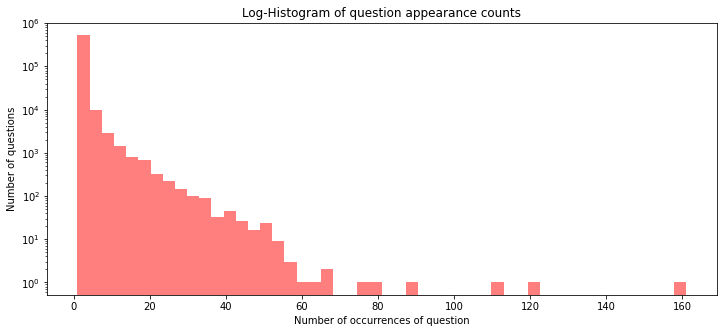

In [ ]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [ ]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd759a7ce50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd759a00910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd759a69550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd759a05410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd759a05e90>],
 'means': [<matplotlib.lines.Line2D at 0x7fd759a05950>]}

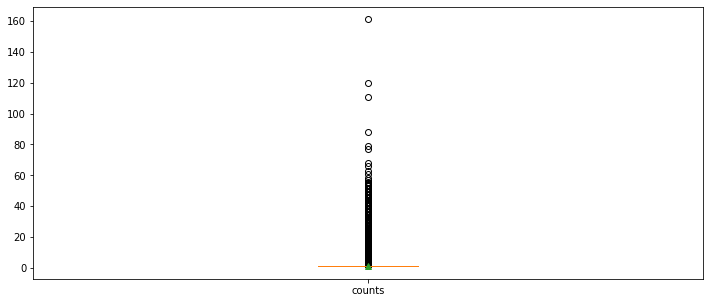

In [ ]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [ ]:
# from wordcloud import WordCloud
# cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
# plt.figure(figsize=(15, 10))
# plt.imshow(cloud)
# plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


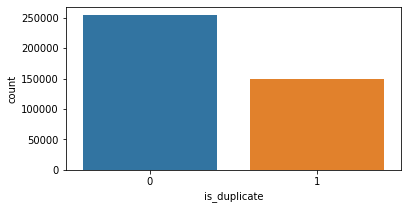

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['is_duplicate'])

In [ ]:
train_length = train_set.apply(len)

Text(0, 0.5, 'Probability')

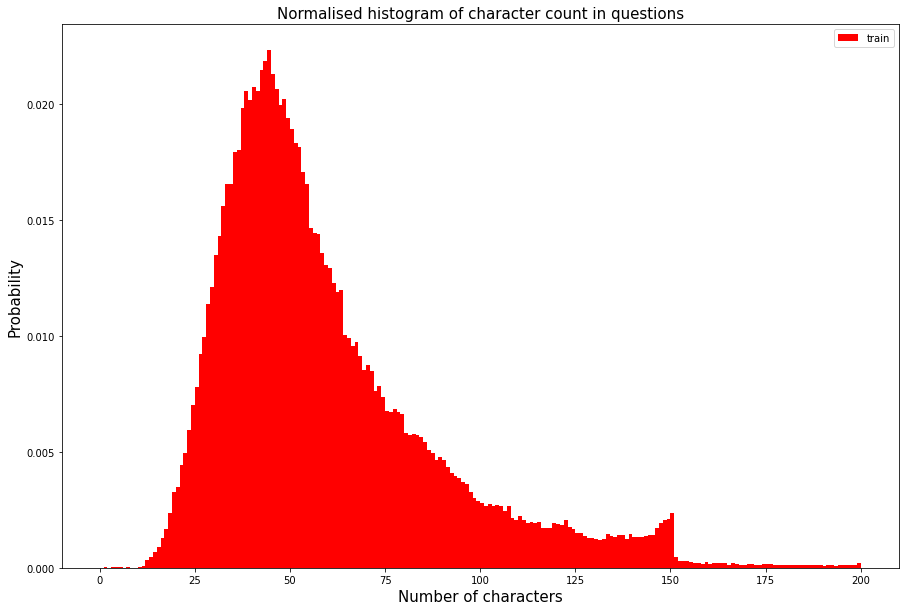

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [ ]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd759711710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7596fe1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd759754d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7596fec90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd75970e750>],
 'means': [<matplotlib.lines.Line2D at 0x7fd75970e210>]}

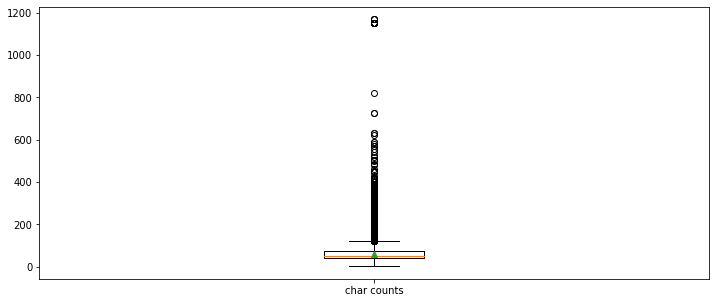

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [ ]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Prabability')

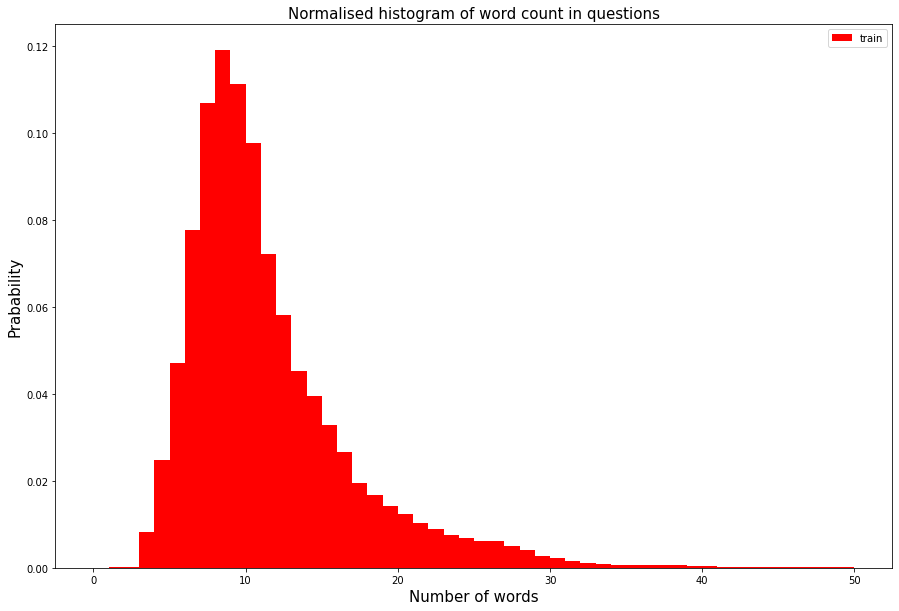

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [ ]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd7595ebd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7595f1850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd7595d5410>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7595f7350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7595f7dd0>],
 'means': [<matplotlib.lines.Line2D at 0x7fd7595f7890>]}

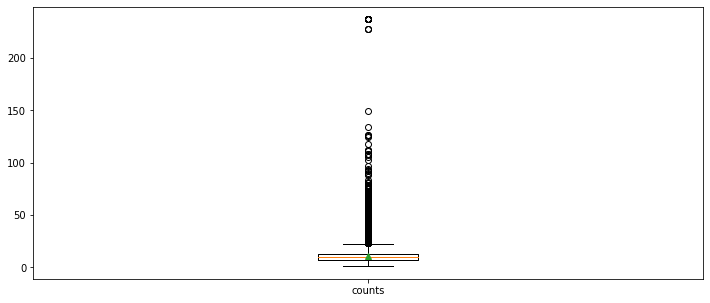

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [ ]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('마침표를 포함한 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
마침표를 포함한 질문: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%


- 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31

change_filter = re.compile(FILTERS)

In [ ]:
train_data = pd.read_csv(DATA_PATH + 'train.csv', encoding='utf-8')

In [ ]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))

train_neg_data = train_neg_data.sample(frac = sample_frac)

In [ ]:
print("중복 질문 개수: {}".format(len(train_pos_data)))
print("중복이 아닌 질문 개수: {}".format(len(train_neg_data)))

중복 질문 개수: 149263
중복이 아닌 질문 개수: 149263


In [ ]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [ ]:
change_filter = re.compile(FILTERS)

questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

for q in questions1:
     filtered_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in questions2:
     filtered_questions2.append(re.sub(change_filter, "", q).lower())

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

In [ ]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [ ]:
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
word_vocab = {}
word_vocab = tokenizer.word_index 
word_vocab["<PAD>"] = 0

labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data:{}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print("Words in index: {}".format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data:(298526, 31)
Shape of label: (298526,)
Words in index: 76254


In [ ]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [ ]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_PATH + DATA_CONFIGS, 'w'))

In [ ]:
test_data = pd.read_csv(DATA_PATH + 'test.csv', encoding='utf-8')
# test_data = test_data.drop(test_data.tail(1217679).index,inplace=True) # drop last n rows
valid_ids = [type(x) ==int for x in test_data.test_id] 
test_data = test_data[valid_ids].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [ ]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [ ]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_PATH + TEST_ID_DATA , 'wb'), test_id)

### 1.3.2 모델링

#### 1.3.2.1 XGboost 텍스트 유사도 분석 모델
- 'eXtream Gradient Boosting'의 약자로 앙상블 모델 중 한 방법인 Boosting 기법을 사용한 모델
- 앙상블 기법
  - 여러 개의 학습 알고리즘을 사용해 더 좋은 성능을 얻는 방법
  - 배깅(Bagging), 부스팅(Boosting)의 기법이 있음
    - 배깅: 
      - 여러 개의 학습 알고리즘, 모델을 통해 각각 결과를 예측한 후, 모든 결과를 동등하게 보고 취합해서 결과를 얻는 방식
    - 부스팅: 
      - 여러 개의 학습 알고리즘, 모델을 통해 각각 결과를 예측한 후, 각 결과를 순차적으로 취합함
      - 단순히 하나씩 취합하는 것이 아니라 이전 알고리즘, 모델이 학습 후 잘못 예측한 부분에 가중치를 주고 다시 모델로 돌아가서 학습하는 방식
        <img src='https://drive.google.com/uc?export=download&id=1Zx9tJonYmWUExQ7MnydOCKHTQEiUKEYt' />
  - XGBoost
    - 트리부스팅 + 경사하강법 + 병렬처리 모델
    - 트리부스팅
      - 의사결정트리+부스팅 방식
      - 여러 개의 의사결정트리를 사용해서 결과를 내며 단순히 결과를 평균내는 것이 아니라 결과를 보고 오답에 대하여 가중치를 부여한 후, 가중치가 적용된 오답에 대해서 관심을 가지고 정답이 될 수 있도록 결과를 만들고, 해당 결과에 대한 다른 오답을 찾아 다시 똑같은 작업을 반복적으로 진행함



In [ ]:
import pandas as pd
import numpy as np
import os

import json

from sklearn.model_selection  import train_test_split

- 설정된 값들

In [ ]:
TRAIN_Q1_DATA_FILE = 'train_q1.npy'
TRAIN_Q2_DATA_FILE = 'train_q2.npy'
TRAIN_LABEL_DATA_FILE = 'train_label.npy'


# 훈련 데이터 가져오는 부분이다.
train_q1_data = np.load(open(DATA_PATH + TRAIN_Q1_DATA_FILE, 'rb'))
train_q2_data = np.load(open(DATA_PATH + TRAIN_Q2_DATA_FILE, 'rb'))
train_labels = np.load(open(DATA_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))

In [ ]:
train_input = np.stack((train_q1_data, train_q2_data), axis=1) 

In [ ]:
print(train_input.shape)

(298526, 2, 31)


- 훈련 셋과 평가 셋 나누기

In [ ]:
train_input, eval_input, train_label, eval_label = train_test_split(train_input, train_labels, test_size=0.2, random_state=4242)

In [ ]:
import xgboost as xgb

- 모델 구성

In [ ]:
train_data = xgb.DMatrix(train_input.sum(axis=1), label=train_label) # 학습 데이터 읽어 오기
eval_data = xgb.DMatrix(eval_input.sum(axis=1), label=eval_label) # 평가 데이터 읽어 오기

data_list = [(train_data, 'train'), (eval_data, 'valid')]

In [ ]:
params = {} # 인자를 통해 XGB모델에 넣어 주자 
params['objective'] = 'binary:logistic' # 로지스틱 예측을 통해서 
params['eval_metric'] = 'rmse' # root mean square error를 사용  

bst = xgb.train(params, train_data, num_boost_round = 1000, evals = data_list, early_stopping_rounds=10)

[0]	train-rmse:0.483945	valid-rmse:0.483828
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.47334	valid-rmse:0.474139
[2]	train-rmse:0.466705	valid-rmse:0.467431
[3]	train-rmse:0.46197	valid-rmse:0.462889
[4]	train-rmse:0.458224	valid-rmse:0.459345
[5]	train-rmse:0.455678	valid-rmse:0.457026
[6]	train-rmse:0.453332	valid-rmse:0.454746
[7]	train-rmse:0.451325	valid-rmse:0.452747
[8]	train-rmse:0.450134	valid-rmse:0.451604
[9]	train-rmse:0.449053	valid-rmse:0.450669
[10]	train-rmse:0.446898	valid-rmse:0.448685
[11]	train-rmse:0.445807	valid-rmse:0.447821
[12]	train-rmse:0.445124	valid-rmse:0.447402
[13]	train-rmse:0.443178	valid-rmse:0.445618
[14]	train-rmse:0.442025	valid-rmse:0.444571
[15]	train-rmse:0.441526	valid-rmse:0.444179
[16]	train-rmse:0.440919	valid-rmse:0.443768
[17]	train-rmse:0.440575	valid-rmse:0.44352
[18]	train-rmse:0.440185	valid-rmse:0.443235
[19]	train-rm

- 테스트 데이터 가져오기

In [ ]:
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_PATH + TEST_Q1_DATA_FILE, 'rb'))
test_q2_data = np.load(open(DATA_PATH + TEST_Q2_DATA_FILE, 'rb'))
test_id_data = np.load(open(DATA_PATH + TEST_ID_DATA_FILE, 'rb'), allow_pickle=True)

- 예측하기

In [ ]:
test_input = np.stack((test_q1_data, test_q2_data), axis=1) 
test_data = xgb.DMatrix(test_input.sum(axis=1))
test_predict = bst.predict(test_data)

In [ ]:
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    
output = pd.DataFrame({'test_id': test_id_data, 'is_duplicate': test_predict})
output.to_csv(DATA_PATH + 'simple_xgb.csv', index=False)

In [ ]:
output

,test_id,is_duplicate
0,0,0.272396
1,1,0.423849
2,2,0.736019
3,3,0.064532
4,4,0.542258
...,...,...
2345791,2345791,0.543184
2345792,2345792,0.516091
2345793,2345793,0.149098
2345794,2345794,0.191625


#### 1.3.2.2 CNN 텍스트 유사도 분석 모델

- 모듈 불러오기

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

- 시각화 함수

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

- 학습 데이터 경로 정의

In [ ]:
DATA_PATH = ROOT_PATH + 'quora/'

In [ ]:
TRAIN_Q1_DATA_FILE = 'train_q1.npy'
TRAIN_Q2_DATA_FILE = 'train_q2.npy'
TRAIN_LABEL_DATA_FILE = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

- 랜덤 시드 고정

In [ ]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

- 파일 로드

In [ ]:
q1_data = np.load(open(DATA_PATH + TRAIN_Q1_DATA_FILE, 'rb'))
q2_data = np.load(open(DATA_PATH + TRAIN_Q2_DATA_FILE, 'rb'))
labels = np.load(open(DATA_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))
prepro_configs = json.load(open(DATA_PATH + DATA_CONFIGS, 'r'))

- 모델 하이퍼파라메터 정의

In [ ]:
model_name = 'cnn_similarity'
BATCH_SIZE = 1024
NUM_EPOCHS = 100
VALID_SPLIT = 0.1
MAX_LEN = 31

kargs = {'model_name': model_name,
         'vocab_size': prepro_configs['vocab_size'],
         'word_embedding_dimension': 100,
         'conv_num_filters': 300,
         'conv_window_size': 3,
         'max_pool_seq_len': MAX_LEN,
         'sent_embedding_dimension': 128,
         'dropout_rate': 0.2,
         'hidden_dimension': 200,
         'output_dimension':1}

- 모델 선언 및 컴파일

In [ ]:
class SentenceEmbedding(layers.Layer):
    def __init__(self, **kargs):
        super(SentenceEmbedding, self).__init__()

        self.conv = layers.Conv1D(kargs['conv_num_filters'], kargs['conv_window_size'], 
                                activation=tf.keras.activations.relu, 
                                padding='same')
        self.max_pool = layers.MaxPool1D(kargs['max_pool_seq_len'], 1)
        self.dense = layers.Dense(kargs['sent_embedding_dimension'], 
                              activation=tf.keras.activations.relu)

    def call(self, x):
        x = self.conv(x)
        x = self.max_pool(x)
        x = self.dense(x)
        
        return tf.squeeze(x, 1)

In [ ]:
class SentenceSimilarityModel(tf.keras.Model):
    def __init__(self, **kargs):
        super(SentenceSimilarityModel, self).__init__(name=kargs['model_name'])
        
        self.word_embedding = layers.Embedding(kargs['vocab_size'], kargs['word_embedding_dimension'])
        self.base_encoder = SentenceEmbedding(**kargs)
        self.hypo_encoder = SentenceEmbedding(**kargs)
        self.dense = layers.Dense(kargs['hidden_dimension'], 
                                           activation=tf.keras.activations.relu)
        self.logit = layers.Dense(1, activation=tf.keras.activations.sigmoid)
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        
    def call(self, x):
        x1, x2 = x
        b_x = self.word_embedding(x1)
        h_x = self.word_embedding(x2)
        b_x = self.dropout(b_x)
        h_x = self.dropout(h_x)
        
        b_x = self.base_encoder(b_x)
        h_x = self.hypo_encoder(h_x)
        
        e_x = tf.concat([b_x, h_x], -1)
        e_x = self.dense(e_x)
        e_x = self.dropout(e_x)
        
        return self.logit(e_x)

In [ ]:
model = SentenceSimilarityModel(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

- Callback 선언

In [ ]:
# overfitting을 막기 위한 ealrystop 추가j
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=1)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

/gdrive/My Drive/Colab Notebooks/00_Lectures/NLP/data/quora/cnn_similarity -- Folder create complete 



- 모델 학습

In [ ]:
history = model.fit((q1_data, q2_data), labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/100
263/263 [==============================] - ETA: 0s - loss: 0.5507 - accuracy: 0.7163
Epoch 1: val_accuracy improved from -inf to 0.70127, saving model to /gdrive/My Drive/Colab Notebooks/00_Lectures/NLP/data/quora/cnn_similarity/weights.h5
263/263 [==============================] - 249s 920ms/step - loss: 0.5507 - accuracy: 0.7163 - val_loss: 0.5517 - val_accuracy: 0.7013
Epoch 2/100
177/263 [===================>..........] - ETA: 1:17 - loss: 0.4468 - accuracy: 0.7902

KeyboardInterrupt: ignored

- 결과 플롯

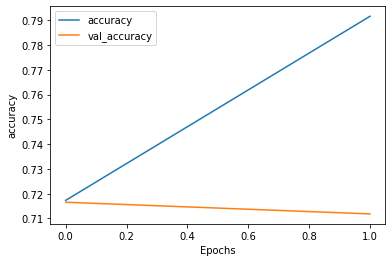

In [ ]:
plot_graphs(history, 'accuracy')

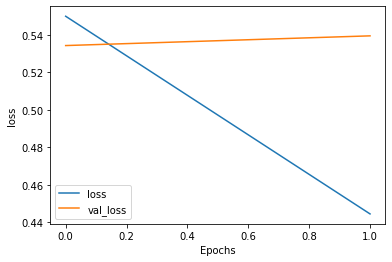

In [ ]:
plot_graphs(history, 'loss')

- 테스트 데이터 불러오기

In [ ]:
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_PATH + TEST_Q1_DATA_FILE, 'rb'))
test_q2_data = np.load(open(DATA_PATH + TEST_Q2_DATA_FILE, 'rb'))
test_id_data = np.load(open(DATA_PATH + TEST_ID_DATA_FILE, 'rb'), allow_pickle=True)

- 베스트 모델 불러오기

In [ ]:
SAVE_FILE_NM = 'weights.h5'
model.load_weights(os.path.join(DATA_PATH, model_name, SAVE_FILE_NM))

- 테스트 데이터 예측하기

In [ ]:
predictions = model.predict((test_q1_data, test_q2_data), batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

In [ ]:
output = pd.DataFrame( data={"test_id":test_id_data, "is_duplicate": list(predictions)} )
output.to_csv("cnn_predict.csv", index=False, quoting=3)

In [ ]:
output

,test_id,is_duplicate
0,0,0.164974
1,1,0.284589
2,2,0.688300
3,3,0.463062
4,4,0.594938
...,...,...
2345791,2345791,0.141911
2345792,2345792,0.048671
2345793,2345793,0.100424
2345794,2345794,0.073064


#### 1.3.2.3 MaLSTM 텍스트 유사도 분석 모델
- MaLSTM
  - Manhattan Distance + LSTM
  - 일반적으로 문장의 유사도를 계산할 때 코사인 유사도를 많이 사용하는데 MaLSTM 모델은 맨해튼 거리를 이용함
  - 순환신경망 계열의 모델이므로 문장을 시퀀스 형태로 학습시키며 또한 기존의 순환신경망 모델보다 장기적인 학습에 효과적인 성능을 보여줌
  - 합성곱 신경망(CNN)모델과 유사한 구조를 가짐
  <img src='https://drive.google.com/uc?export=download&id=11uGiJnlLC8cWczcnq2o2ze_SJiENehsR' />

- 모듈 불러오기

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

- 시각화 함수

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

- 학습 데이터 파일 로드

In [ ]:
DATA_PATH = ROOT_PATH + 'quora/'
TRAIN_Q1_DATA_FILE = 'train_q1.npy'
TRAIN_Q2_DATA_FILE = 'train_q2.npy'
TRAIN_LABEL_DATA_FILE = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

- 랜덤 시드 고정

In [ ]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

- 파일 로드

In [ ]:
q1_data = np.load(open(DATA_PATH + TRAIN_Q1_DATA_FILE, 'rb'))
q2_data = np.load(open(DATA_PATH + TRAIN_Q2_DATA_FILE, 'rb'))
labels = np.load(open(DATA_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))
prepro_configs = json.load(open(DATA_PATH + DATA_CONFIGS, 'r'))

- 모델 하이퍼파라메터 정의

In [ ]:
model_name = 'malstm_similarity'
BATCH_SIZE = 128
NUM_EPOCHS = 5
VALID_SPLIT = 0.1

kargs = {
    'vocab_size': prepro_configs['vocab_size'],
    'embedding_dimension': 100,
    'lstm_dimension': 150,
}

- 모델 선언 및 컴파일

In [ ]:
class MaLSTM(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(MaLSTM, self).__init__(name=model_name)
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_dimension'])
        self.lstm = layers.LSTM(units=kargs['lstm_dimension'])
        
    def call(self, x):
        x1, x2 = x
        x1 = self.embedding(x1)
        x2 = self.embedding(x2)
        x1 = self.lstm(x1)
        x2 = self.lstm(x2)
        x = tf.exp(-tf.reduce_sum(tf.abs(x1 - x2), axis=1))
        
        return x

In [ ]:
model = MaLSTM(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

- Callback 선언

In [ ]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=1)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

/gdrive/My Drive/Colab Notebooks/NLP_160H/data/quora/malstm_similarity -- Folder create complete 



- 모델 학습

In [ ]:
history = model.fit((q1_data, q2_data), labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/5
2100/2100 [==============================] - ETA: 0s - loss: 0.5296 - accuracy: 0.7360
Epoch 1: val_accuracy improved from -inf to 0.60213, saving model to /gdrive/My Drive/Colab Notebooks/NLP_160H/data/quora/malstm_similarity/weights.h5
2100/2100 [==============================] - 87s 39ms/step - loss: 0.5296 - accuracy: 0.7360 - val_loss: 0.7294 - val_accuracy: 0.6021
Epoch 2/5
2099/2100 [============================>.] - ETA: 0s - loss: 0.4030 - accuracy: 0.8201
Epoch 2: val_accuracy improved from 0.60213 to 0.74793, saving model to /gdrive/My Drive/Colab Notebooks/NLP_160H/data/quora/malstm_similarity/weights.h5
2100/2100 [==============================] - 83s 39ms/step - loss: 0.4030 - accuracy: 0.8202 - val_loss: 0.5511 - val_accuracy: 0.7479
Epoch 3/5
2100/2100 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8485
Epoch 3: val_accuracy improved from 0.74793 to 0.83610, saving model to /gdrive/My Drive/Colab Notebooks/NLP_160H/data/quora/malstm_si

- 결과 플롯

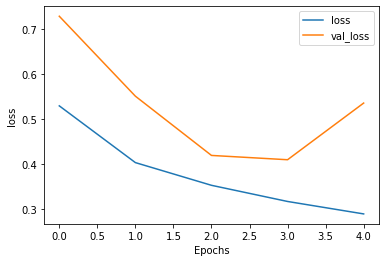

In [ ]:
plot_graphs(history, 'loss')

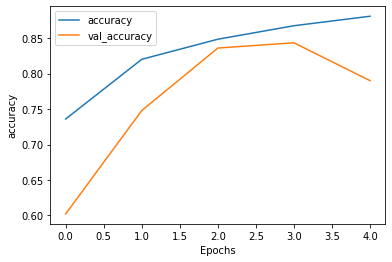

In [ ]:
plot_graphs(history, 'accuracy')

- 테스트 데이터 불러오기

In [ ]:
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_PATH + TEST_Q1_DATA_FILE, 'rb'))
test_q2_data = np.load(open(DATA_PATH + TEST_Q2_DATA_FILE, 'rb'))
test_id_data = np.load(open(DATA_PATH + TEST_ID_DATA_FILE, 'rb'), allow_pickle=True)

- 베스트 모델 불러오기

In [ ]:
SAVE_FILE_NM = 'weights.h5'
model.load_weights(os.path.join(DATA_PATH, model_name, SAVE_FILE_NM))

- 베스트 데이터 예측하기

In [ ]:
predictions = model.predict((test_q1_data, test_q2_data), batch_size=BATCH_SIZE)

In [ ]:
output = pd.DataFrame( data={"test_id":test_id_data, "is_duplicate": list(predictions)} )
output.to_csv(DATA_PATH+"rnn_predict.csv", index=False, quoting=3)

In [ ]:
output

,test_id,is_duplicate
0,0,0.353966
1,1,0.378776
2,2,0.695531
3,3,0.041120
4,4,0.795739
...,...,...
2345791,2345791,0.017154
2345792,2345792,0.012528
2345793,2345793,0.134952
2345794,2345794,0.016140


# **2. k-평균(k-Means)을 이용한 군집화(Clustering)**

## **2.1 K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
irisDF.shape

(150, 4)

In [ ]:
# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
# irisDF['cluster']=kmeans.labels_ 개정 소스코드 변경(2019.12.24)

irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


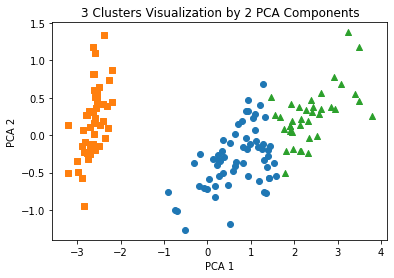

In [ ]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


## **2.2 Clustering 알고리즘 테스트를 위한 데이터 생성**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


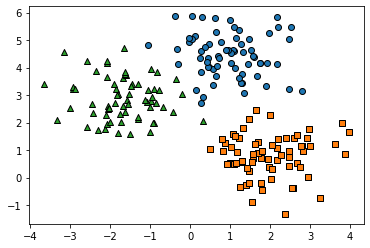

In [ ]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

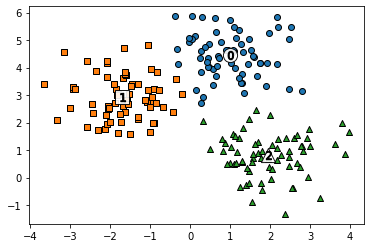

In [ ]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


## **2.3 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

## **2.4 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법**

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

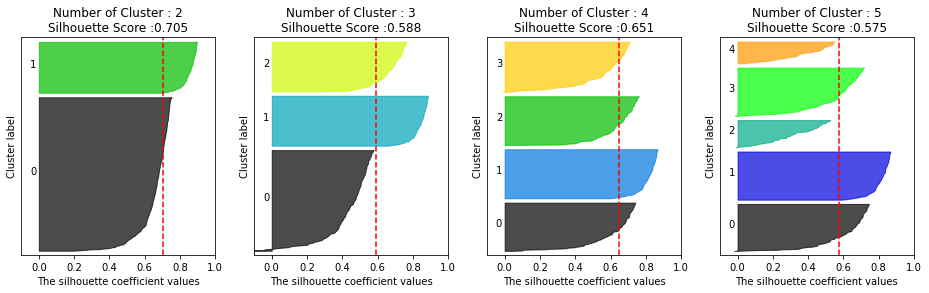

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

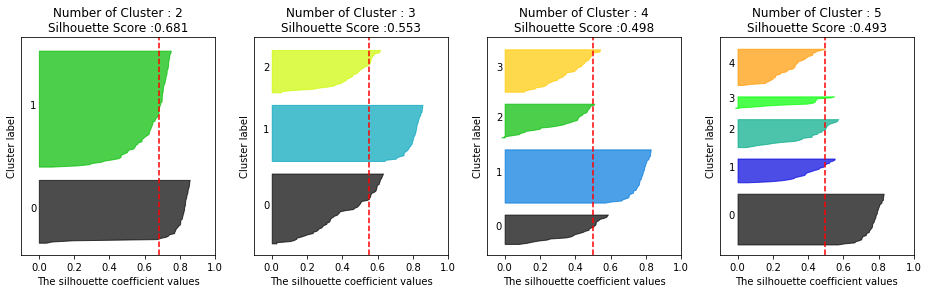

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

# **3. 평균 이동(Mean Shift)**

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [ ]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [ ]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


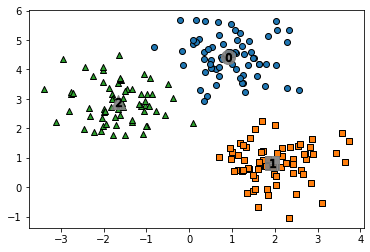

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()


In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


# **4. GMM (Gaussian Mixture Model)**

## **4.1 GMM을 이용한 붓꽃 데이터 셋 군집화**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

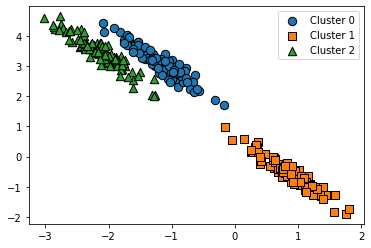

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


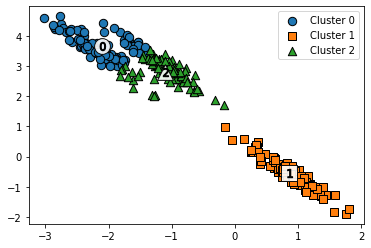

In [ ]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

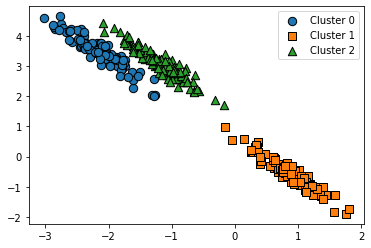

In [ ]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)


In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# **5. DBSCAN**

## 5.1 DBSCAN 적용하기 – 붓꽃 데이터 셋

In [ ]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

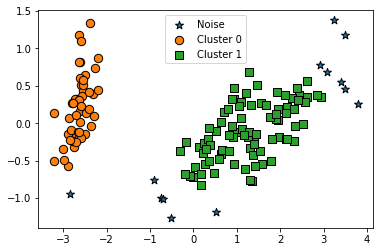

In [ ]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


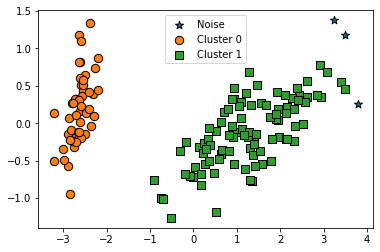

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


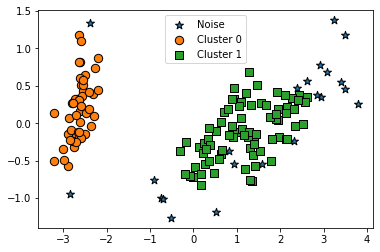

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

## **5.2 DBSCAN 적용하기 – make_circles() 데이터 세트**

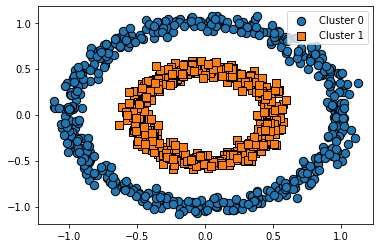

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


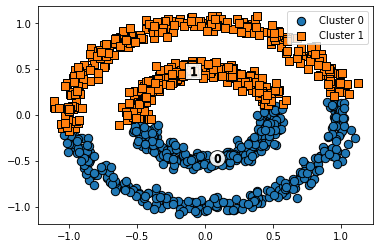

In [ ]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


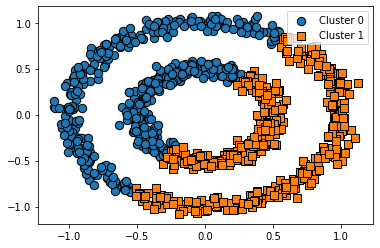

In [ ]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


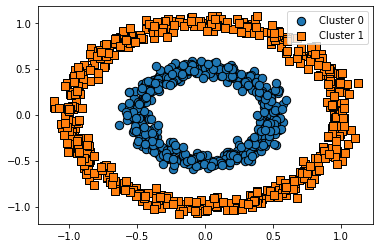

In [ ]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)


# **6. 군집화 실습 - 고객 세그멘테이션**

- 고객 세그멘테이션(Customer Segmentation)
  - 다양한 기준으로 고객을 분류하는 기법을 말하며 
  - CRM(Customer Relationship Management, 고객 관계 관리)이나 마케팅의 중요한 기반 요소

- 고객 분류 요소
  - 신상 데이터(지역/결혼여부/성별/소득 등)를 활용할 수도 있지만
  - 고객 분류가 사용되는 대부분의 비즈니스는 상품 판매에 중점을 두고 있으므로
  - 어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는가.. 에 기반을 둔 정보(더 중요한 분류 요소가 됨)로 분류하는 것이 좋음
  - 기업 입장에서는 얼마나 많은 매출을 발생시키느냐가 고객 기준을 정하는 중요한 요소가 됨

- 고객 세그멘테이션의 주요 목표: 타겟 마케팅
  - 타겟 마케팅: 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것
  - 기업의 마케팅은 고객의 상품 구매 이력에서 출발함

- 고객 세그멘 테이션은
  - 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요함
  - 예제에서는 기본적인 고객 분석 요소 RFM 기법 이용
    - R(Recency): 가장 최근의 상품 구입일에서 오늘까지의 기간
    - F(Frequency): 상품 구매 횟수
    - M(Monetary Value): 총 구매 금액

- 예제에서는 온라인 판매 데이터를 기반으로 하여 고객 세그멘테이션을 군집화 기반으로 수행함

- 사용 데이터 세트
  - http://archive.ics.uci.edu/ml/datasets/online+retail

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

--2022-08-22 00:33:18--  http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23715344 (23M) [application/x-httpd-php]
Saving to: ‘Online Retail.xlsx’

Online Retail.xlsx  100%[===================>]  22.62M  23.9MB/s    in 0.9s    

2022-08-22 00:33:20 (23.9 MB/s) - ‘Online Retail.xlsx’ saved [23715344/23715344]



## **6.1 데이터 셋 로딩과 데이터 클린징**

In [ ]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [ ]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


## **6.2 RFM 기반 데이터 가공**

In [ ]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [ ]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [ ]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [ ]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [ ]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


## **6.3 RFM 기반 고객 세그먼테이션**

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

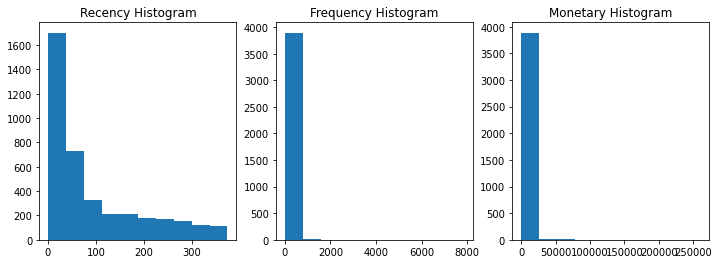

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [ ]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 계수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

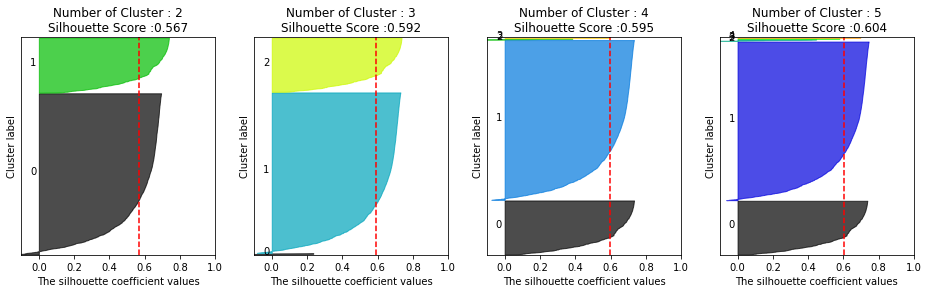

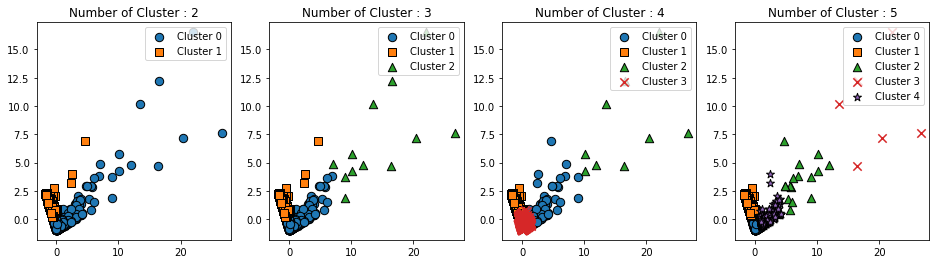

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.303


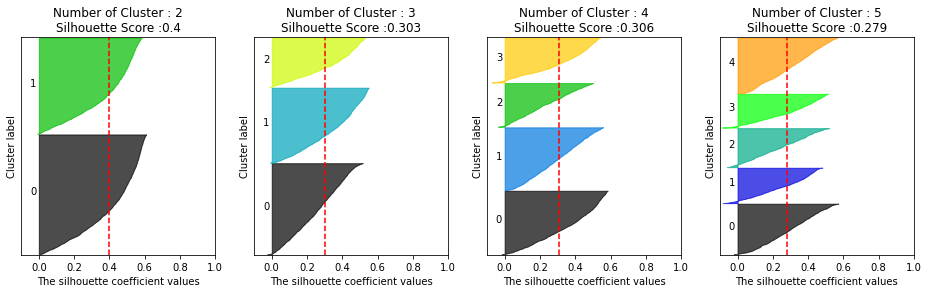

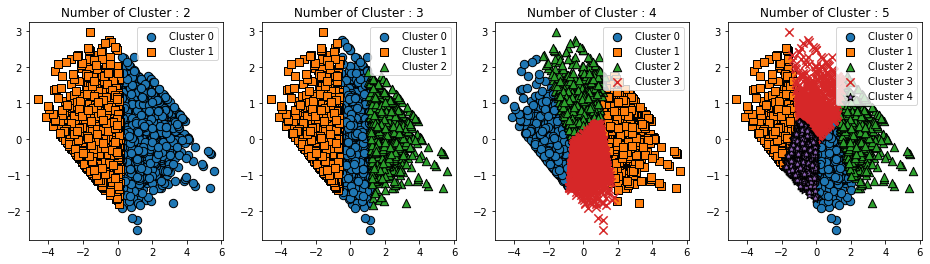

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

# **7. 계층형 군집화**
- Hierarchical Clustering은 Tree기반의 모델이다. 
- 2차원의 데이터의 경우, 2차원 데이터는 좌표로 가시적으로 군집을 시각화시킬수 있지만, 3차원은 보기가 힘들어진다. 그리고 4차원이 넘어서면, 시각화가 거의 불가능해진다. 
- Hierarchical clustering은 이러한 3차원 이상의 군집에서도 dendogram을 통해 직관적인 cluster 형성이 가능하다는 장점이 있다.

## **7.1 기본적인 계층형 군집화(Hierarchical Clustering)**

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/00_Lectures/NLP/data/'

In [ ]:
# 기본 library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# 실습데이터 형성
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

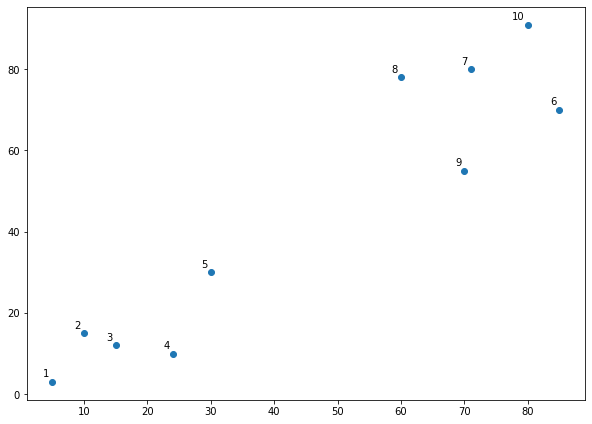

In [ ]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

- scipy.cluster.hierarchy 패키지를 통해서 구현
- hierarchical clustering의 특성 중 하나인 clustering을 dendogram으로 표현하기 위해서 dendogram 또한 함께 import
- linkage함수에 인수로 feature data X를 넣었는데 이는 거리를 계산하는 method 알고리즘의 차이임. scipy에 보다 자세한 설명이 나와있음

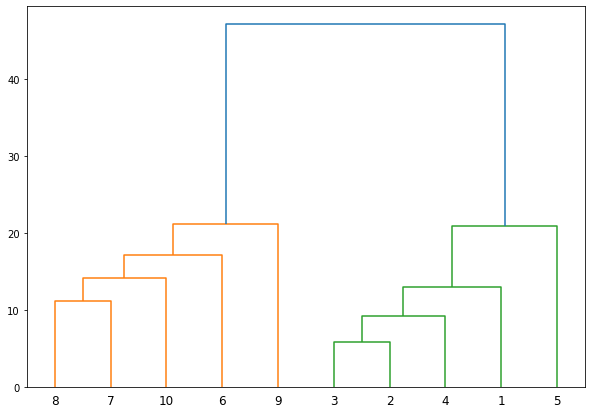

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'single')
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## **7.2 Shopping data Hierarchical Clustering**

In [ ]:
DATA_PATH = ROOT_PATH + 'hc/'

In [ ]:
customer_data = pd.read_csv(DATA_PATH + 'shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- Ward method 알고리즘을 통해서 Hierarchical Clustering 진행
- 이는 거리계산방법의 차이라고 위에서 언급
- scipy를 통해 Hierarchical Clustering 실습

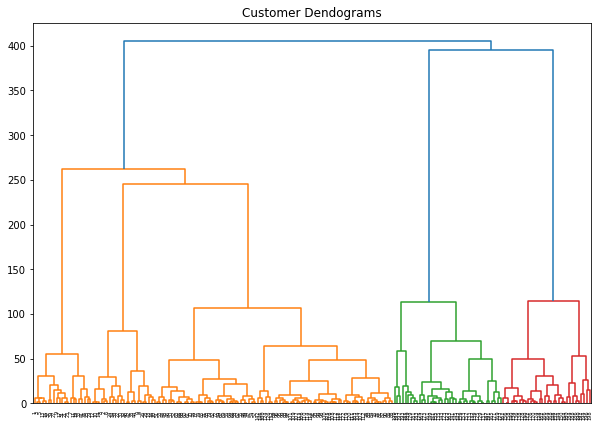

In [ ]:
data = customer_data.iloc[:, 3:5].values

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

- 군집 분석의 결과
- sklearn같은 경우는 dendrogram을 통해서 확인하는 함수가 존재하지 않으므로 만약 dendrogram을 통해서 시각화를 진행하고 싶다면 scipy라이브러리를 활용

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

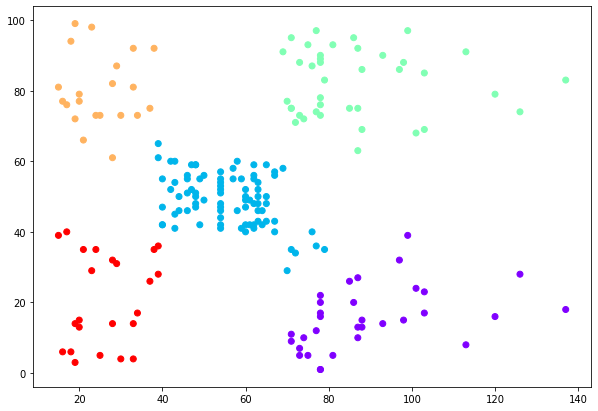

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

## **7.3 Boston House data Hierarchical Clustering**

In [ ]:
# 데이터 불러오기
data = pd.read_csv(DATA_PATH + "Boston_house.csv") 
data.head() # 데이터 확인

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [ ]:
target=data['Target']
data = data.drop(['Target'], axis = 1) 
data.shape

(506, 13)

- scipy의 Hierarchy 라이브러리에서 활용한 dendrogram

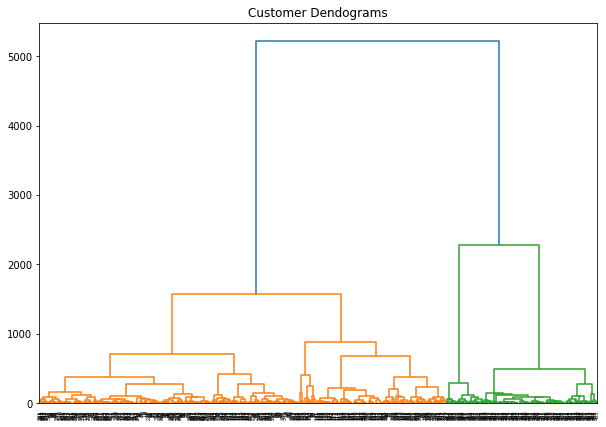

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

- sklearn의 agglomerativeClustering을 활용한 결과

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

-  y = 0 군집의 평균

In [ ]:
np.mean([x for x, y in zip(target,cluster.fit_predict(data)) if  y == 0])

16.272262773722627

-  y = 1 군집의 평균

In [ ]:
np.mean([x for x, y in zip(target,cluster.fit_predict(data)) if  y == 1])

24.857181571815715

- 기술통계의 요약인 describe()함수를 사용하여 각 변수별 사분위수와 평균/표준편차를 확인할 수 있다.

In [ ]:
data.iloc[cluster.fit_predict(data)==0,:].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,137.000000,137.000000,137.000000,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000
mean,89.967883,291.039051,6.006212,12.299162,2.05447,18.451825,18.674526,0.670102,20.196350,23.270073,0.0,667.642336,0.058394
std,12.469840,144.089867,0.713021,13.017296,0.60790,1.814342,6.873577,0.061051,0.018821,3.764196,0.0,8.469441,0.235348
min,40.300000,0.320000,3.561000,0.105740,1.12960,18.100000,2.960000,0.532000,20.100000,4.000000,0.0,666.000000,0.000000
25%,86.100000,210.970000,5.683000,5.441140,1.58950,18.100000,14.190000,0.614000,20.200000,24.000000,0.0,666.000000,0.000000
50%,94.500000,374.560000,6.152000,8.716750,1.92650,18.100000,18.050000,0.693000,20.200000,24.000000,0.0,666.000000,0.000000
75%,98.800000,395.280000,6.411000,14.236200,2.36820,18.100000,23.240000,0.713000,20.200000,24.000000,0.0,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,4.09830,27.740000,37.970000,0.770000,20.200000,24.000000,0.0,711.000000,1.000000


In [ ]:
data.iloc[cluster.fit_predict(data)==1,:].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,60.632249,381.042575,6.388005,0.388774,4.441272,8.420894,10.417453,0.511847,17.809214,4.455285,15.582656,311.926829,0.073171
std,28.217681,39.567014,0.670817,0.628724,2.097985,6.004356,5.831720,0.101241,2.210135,1.643095,26.086641,67.828288,0.260770
min,2.900000,70.800000,4.903000,0.006320,1.321600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,35.900000,383.780000,5.933000,0.057890,2.714700,4.000000,6.120000,0.437000,16.400000,4.000000,0.000000,270.000000,0.000000
50%,62.200000,392.780000,6.245000,0.131580,4.052200,6.410000,9.380000,0.493000,17.900000,4.000000,0.000000,304.000000,0.000000
75%,88.000000,396.330000,6.727000,0.369200,5.873600,10.010000,13.280000,0.544000,19.200000,5.000000,22.000000,384.000000,0.000000
max,100.000000,396.900000,8.725000,4.097400,12.126500,25.650000,34.410000,0.871000,22.000000,8.000000,100.000000,469.000000,1.000000


# **8. 토픽 모델링**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)


Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **9. 문서 군집화 실습 - Opinion Review 데이터 세트**

- 문서 군집화(Document Clustering) 개념
  - 비슷한 텍스트 구성의 문서를 군집화하는 것
  - 문서 군집화는 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 텍스트 분류 기법 기반의 문서 분류와 유사함
  - 그러나 텍스트 분류 기법 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요하지만
  - 문서 군집화는 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작함

- 사용 데이터 셋
  - https://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review

## **9.1 Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기**

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip

--2022-08-22 02:12:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773840 (756K) [application/x-httpd-php]
Saving to: ‘OpinosisDataset1.0.zip’

OpinosisDataset1.0. 100%[===================>] 755.70K  2.27MB/s    in 0.3s    

2022-08-22 02:12:50 (2.27 MB/s) - ‘OpinosisDataset1.0.zip’ saved [773840/773840]



In [ ]:
import zipfile

In [ ]:
zipRef = zipfile.ZipFile('OpinosisDataset1.0.zip', 'r')
zipRef.extractall()
zipRef.close()

In [ ]:
import pandas as pd
import glob ,os

# 아래는 제 컴퓨터에서 압축 파일을 풀어 놓은 디렉토리이니, 여러분의 디렉토리를 설정해 주십시요  
path = r'./OpinosisDataset1.0/topics'                     
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,,...
1,,...
2,,headphone jack i got a clear case for it a...
3,,...
4,,...


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
remove_punct_dict

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [ ]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,,...,0
1,,...,2
2,,headphone jack i got a clear case for it a...,4
3,,...,1
4,,...,4


In [ ]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,,...,0
6,,...,0
10,,...,0
12,,...,0
14,,...,0
16,,...,0
20,,...,0
31,,...,0
35,,...,0
36,,...,0


In [ ]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
3,,...,1
9,,...,1
15,,...,1
30,,...,1
32,,...,1
37,,...,1
43,,...,1
45,,...,1


In [ ]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",2
5,buttons_amazon_kindle,I thought it would be fitting to christen ...,2
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken ...,2
9,display_garmin_nuvi_255W_gps,3 quot widescreen display was a ...,2
10,eyesight-issues_amazon_kindle,It feels as easy to read as the K1 but doe...,2
11,features_windows7,"I had to uninstall anti, virus and selecte...",2
12,fonts_amazon_kindle,Being able to change the font sizes is aw...,2
23,navigation_amazon_kindle,"In fact, the entire navigation structure h...",2
33,satellite_garmin_nuvi_255W_gps,It's fast to acquire satel...,2
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the...,2


In [ ]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,food_holiday_inn_london,The room was packed to capacity with queu...,3
14,food_swissotel_chicago,The food for our event was deli...,3
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it i...,3
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal ...",3
21,location_holiday_inn_london,Great location for tube and we crammed in...,3
24,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is ...,3
27,price_amazon_kindle,"If a case was included, as with the Kindle...",3
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice...",3
38,service_bestwestern_hotel_sfo,Both of us having worked in tourism for o...,3
39,service_holiday_inn_london,"not customer, oriented hotelvery low servi...",3


In [ ]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car its...",4
7,comfort_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,4
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,4
17,interior_honda_accord_2008,I love the new body style and the interior...,4
18,interior_toyota_camry_2007,"First of all, the interior has way too ma...",4
22,mileage_honda_accord_2008,"It's quiet, get good gas mileage and look...",4
25,performance_honda_accord_2008,"Very happy with my 08 Accord, performance i...",4
29,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which ...,4
37,seats_honda_accord_2008,Front seats are very uncomfor...,4
47,transmission_toyota_camry_2007,"After slowing down, transmission has to b...",4


In [ ]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,,...,0
41,,...,0
40,,...,0
39,,...,0
30,,...,0
29,,...,0
23,,...,0
22,,...,0
21,,...,0
19,,...,0


## **9.2 군집(Cluster)별 핵심 단어 추출하기**


In [ ]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (5, 4611)
[[0.00529646 0.00084138 0.         ... 0.         0.         0.        ]
 [0.         0.00148002 0.00111886 ... 0.         0.00136134 0.0025549 ]
 [0.         0.00045329 0.00211013 ... 0.         0.00205032 0.00029931]
 [0.00968662 0.         0.         ... 0.00980955 0.         0.        ]
 [0.00374203 0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details


In [ ]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')


In [ ]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=5, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['interior', 'seat', 'mileage', 'performance', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'quality']
Reviews 파일명 : ['', '', '', '', '', '', '']
####### Cluster 1
Top features: ['service', 'food', 'hotel', 'price', 'room', 'location', 'room service', 'service wa', 'breakfast', 'restaurant']
Reviews 파일명 : ['', '', '', '', '', '', '']
####### Cluster 2
Top features: ['room', 'staff', 'hotel', 'bathroom', 'clean', 'parking', 'location', 'free', 'room wa', 'staff wa']
Reviews 파일명 : ['', '', '', '', '', '', '']
####### Cluster 3
Top features: ['screen', 'keyboard', 'direction', 'voice', 'map', 'size', 'button', 'feature', 'page', 'speed']
Reviews 파일명 : ['', '', '', '', '', '', '']
####### Cluster 4
Top features: ['battery', 'battery life', 'video', 'life', 'sound', 'ipod', 'sound quality', 'camera', 'video camera', 'quality']
Reviews 파일명 : ['', '', '', '', '']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## **9.3 문서 유사도 측정 방법 – 코사인 유사도**

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))


문장 1, 문장 2 Cosine 유사도: 0.402


In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)


[[1.         0.40207758 0.40425045]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


## **9.4 Opinion Review 데이터 셋을 이용한 문서 유사도 측정**

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'./OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)


호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([6, 10, 12, 14, 16, 20, 31, 35, 36, 40], dtype='int64')
##### 비교 기준 문서명    와 타 문서 유사도######
[[1.         0.27569738 0.25981841 0.15655631 0.65502034 0.06229873
  0.83969704 0.18050974 0.33044002 0.16544257]]


Text(0.5, 1.0, '')

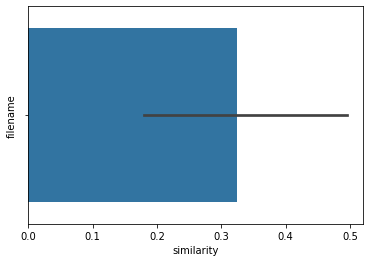

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)